# K-Means Clustering
An example of how we find clusters in data using K-Means

The data is from the 1990 California census.

## 1. Library Imports and Data Loading

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("data/housing.csv")

## 2. Understanding the Data

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


We are going to be clustering our dataset by location.

<Axes: xlabel='longitude', ylabel='latitude'>

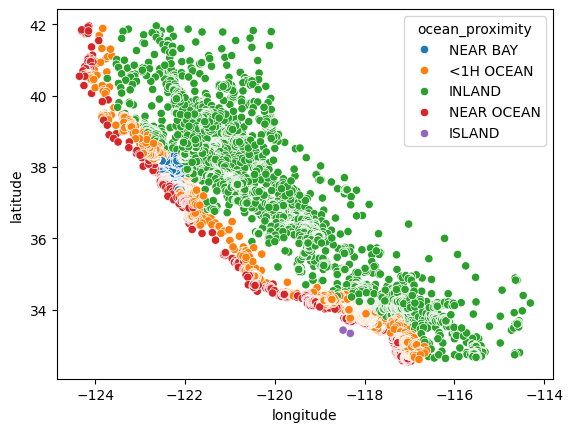

In [5]:
# Scatterplot (position vs ocean_proximity)
sns.scatterplot(data=df, x="longitude", y="latitude", hue = "ocean_proximity")

## 3. Data Processing

In [6]:
cols = ["latitude", "longitude"]

# Scaling the data (required for kmeans)
scaler = MinMaxScaler()
scaler = scaler.fit(df[cols])
df_scaled = pd.DataFrame(scaler.transform(df[cols]), columns = cols)

## 4. Hyperparameter Tuning

In [7]:
inertias = []
for k in range (1,11):
    model = KMeans(n_clusters=k, random_state=5)
    model.fit(df_scaled)
    inertias.append(model.inertia_)

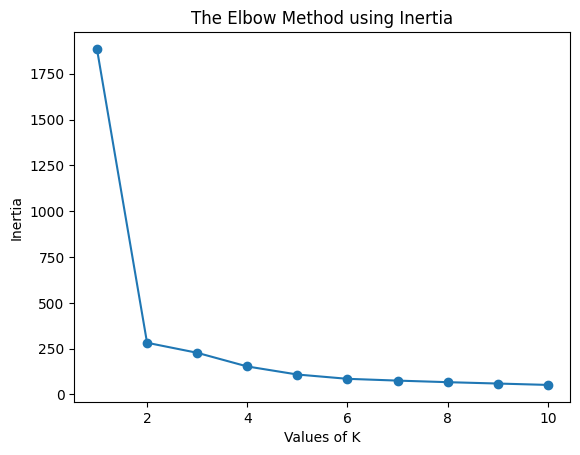

In [8]:
# Plot the inertias to find the Elbow
plt.plot(range(1, 11), inertias, marker="o")
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.title("The Elbow Method using Inertia")
plt.show()

## 5. Build our Model

In [9]:
# Construct model w/ 2 clusters (no significant change in intertia after that)
model = KMeans(n_clusters=2, random_state=5)
model = model.fit(df_scaled)

## 6. Viewing Results

In [12]:
model.labels_
model.inertia_
model.cluster_centers_
df["label"] = model.labels_
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,label
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


<Axes: xlabel='longitude', ylabel='latitude'>

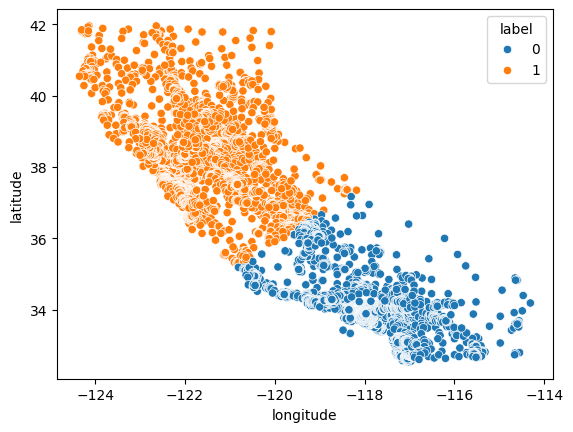

In [13]:
sns.scatterplot(data=df, x="longitude", y="latitude", hue="label")

## 7. Evaluation

In [17]:
silhouette_score(df_scaled, model.labels_)

0.7577227929846988